<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/Sales_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
# Load the CSV from GitHub
url = "https://raw.githubusercontent.com/Taweilo/sales-prediction-from-media-spend/refs/heads/main/Data_Dummy%20Data%20HSS.csv"
df = pd.read_csv(url)
# Display first few rows
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [49]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [50]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [51]:
df = df.dropna(subset=['Sales'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4556 non-null   float64
 1   Radio         4562 non-null   float64
 2   Social Media  4560 non-null   float64
 3   Influencer    4566 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.0+ KB


In [52]:
# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int", "float"]).columns.tolist()

# Remove the target variable "Exited" from numerical features
numerical_features.remove("Sales")

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Influencer']
Numerical Features: ['TV', 'Radio', 'Social Media']


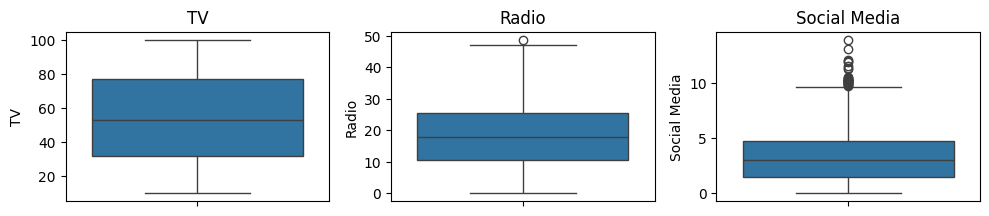

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot box plots for each numerical feature
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust grid size based on number of features
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [54]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype in ['float', 'int']:  # Numerical columns
            df[column].fillna(df[column].mean(), inplace=True)
        else:  # Categorical columns
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Apply the function to your DataFrame
df = fill_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4566 non-null   float64
 1   Radio         4566 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4566 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.0+ KB


<ipython-input-54-f0e2cfc8106e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-54-f0e2cfc8106e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

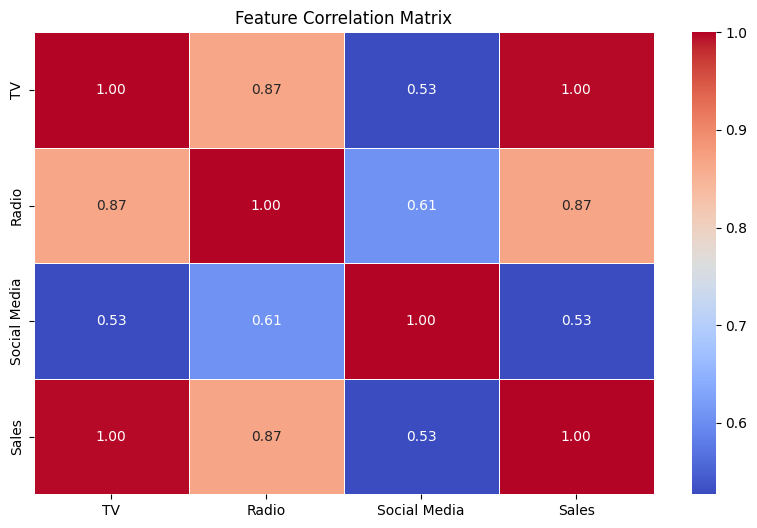

In [55]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

high correlation between radio and TV

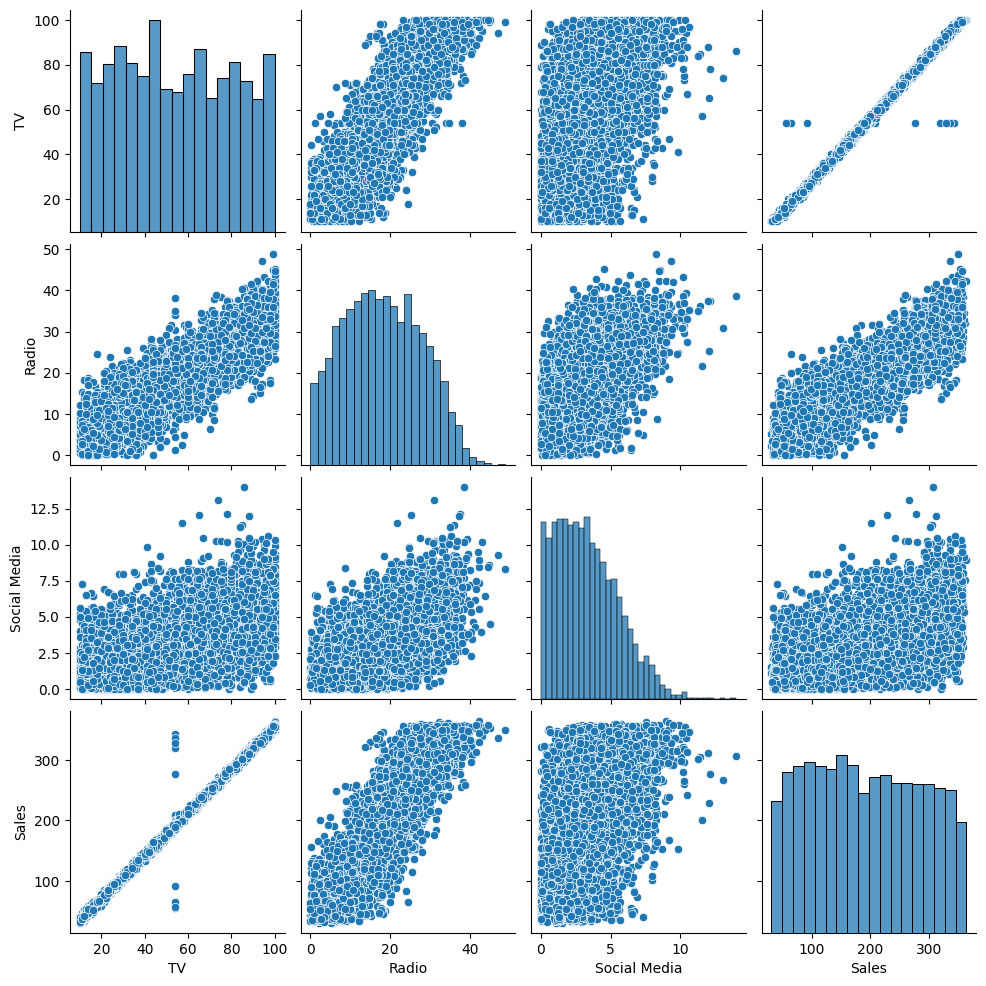

In [56]:
sns.pairplot(df)

many features look linearly correlated

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,0.066667,0.134346,0.207984,Mega,54.732757
1,0.033333,0.189011,0.172336,Mega,46.677897
2,0.344444,0.325058,0.208372,Mega,150.177829
3,0.811111,0.614263,0.495098,Mega,298.246340
4,0.055556,0.172634,0.100558,Micro,56.594181


In [58]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,0.066667,0.134346,0.207984,54.732757,True,False,False
1,0.033333,0.189011,0.172336,46.677897,True,False,False
2,0.344444,0.325058,0.208372,150.177829,True,False,False
3,0.811111,0.614263,0.495098,298.246340,True,False,False
4,0.055556,0.172634,0.100558,56.594181,False,True,False


In [59]:
y=df['Sales']
X=df.drop(columns=['Sales'])

In [60]:
from sklearn.model_selection import train_test_split
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coefficients: [316.42869999   6.54769112   0.86632708   0.66058908   0.75477319
   0.46790242]
Intercept: 34.38012462641976
Mean Squared Error: 33.33653465070243
R² Score: 0.9961342713657574


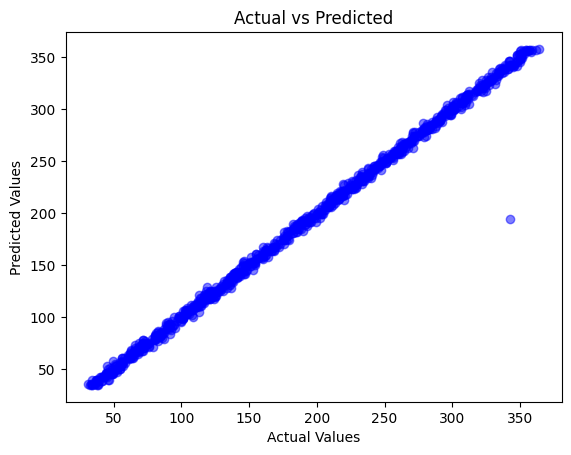

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Ridge

Coefficients: [312.62834543  11.23581319   0.9716561    0.61146651   0.70881113
   0.44608682]
Intercept: 34.510363391811694
Mean Squared Error: 33.61395962950062
R² Score: 0.9961021009648554


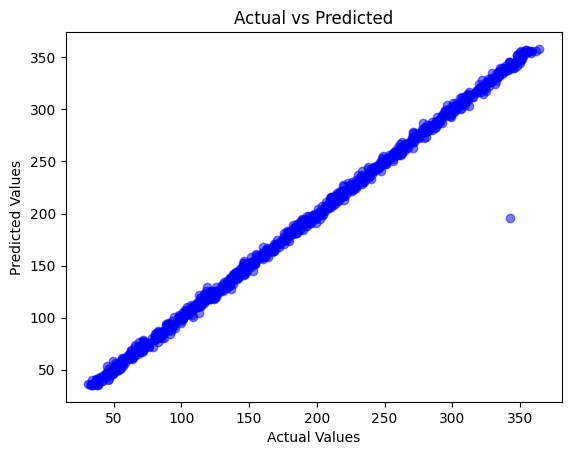

In [62]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# DNN

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
        Dense(64, activation='relu', input_shape=(len(X_train.columns),), kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(1)  # Output Layer (Regression Task)
    ])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 39.250748610807996
R² Score: 0.9954484548436091


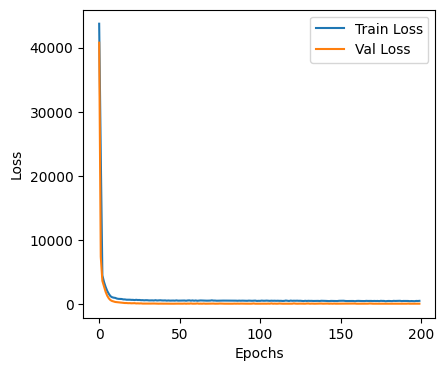

In [65]:
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# ensemble method

In [68]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Create a LightGBM model
lgb_model = lgb.LGBMRegressor()

# Define the parameter grid for tuning
param_grid = {
    'num_leaves': [31],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_samples': [20, 30, 40]
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_grid, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# Fit the model with the best hyperparameters found
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Predict on validation data
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Best MSE: {mse}")

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 2921, number of used features: 6
[LightGBM] [Info] Start training from score 191.831399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g